In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day11\Country-data.csv", index_col=0)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


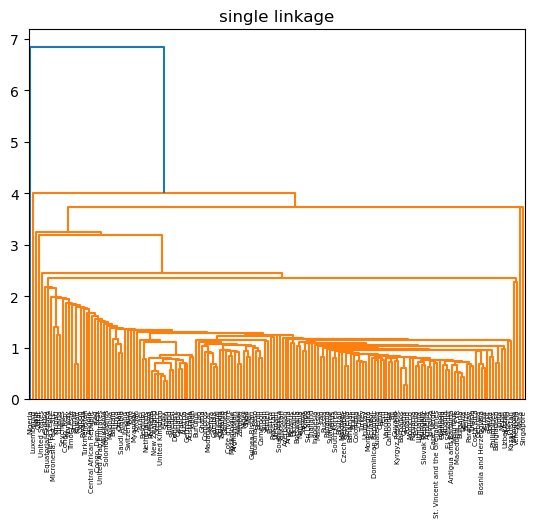

In [8]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [9]:
clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled)

print(clust.labels_)

df_clust = df.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

print(silhouette_score(df_scaled, clust.labels_))

[2 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 2 1 0 1 0 1 1 2 2 1 2 1 0 1 1 1 1 0
 0 0 1 0 1 1 2 1 0 1 1 1 1 1 1 0 1 0 1 2 2 1 1 2 0 1 1 1 1 1 1 1 2 1 1 1 0
 0 2 1 0 0 1 1 1 1 1 1 0 0 1 1 2 1 0 2 1 1 2 0 1 1 1 1 1 0 1 1 1 1 0 0 1 2
 1 1 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 1 2]
0.24563001303300652


In [10]:
Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 2
Best Score: 0.3153134331018189


In [11]:
#pca performed
pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_ * 100)

[45.95173979 17.18162565 13.0042589  11.05316181  7.34021142  2.48423468
  1.2604304   0.98128174  0.74305562]


In [12]:
#labels
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

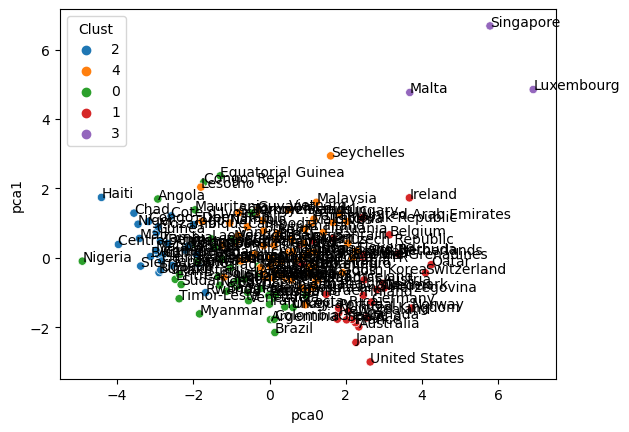

In [13]:
sns.scatterplot(data = principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in range(0, df.shape[0] ):
    plt.text(principalComponents.values[i,0], 
             principalComponents.values[i,1], 
             list(df.index)[i])
plt.show()

In [15]:
df_clusters = pd.DataFrame({'Country': list(df.index), 'Labels': clust.labels_})

In [16]:
df_clusters

,Country,Labels
0,Afghanistan,2
1,Albania,4
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,4
...,...,...
162,Vanuatu,4
163,Venezuela,0
164,Vietnam,4
165,Yemen,0
